In [51]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from env import user, host, password
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# read Iris data from pydatset
df = data('iris')

df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [5]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species


In [6]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [7]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

[Text(0.3333333333333333, 0.875, 'petal_length <= 2.6\ngini = 0.667\nsamples = 84\nvalue = [28, 28, 28]\nclass = setosa'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal_length <= 4.75\ngini = 0.5\nsamples = 56\nvalue = [0, 28, 28]\nclass = versicolor'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'petal_length <= 4.95\ngini = 0.175\nsamples = 31\nvalue = [0, 3, 28]\nclass = virginica'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(0.8333333333333334, 0.125, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]\nclass = virginica')]

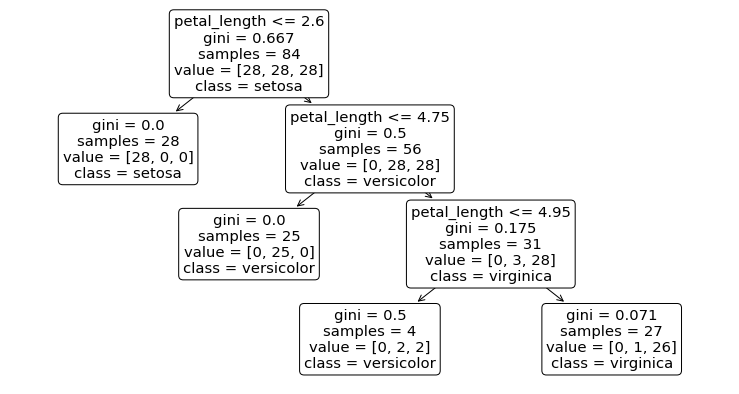

In [8]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)


In [9]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [10]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03703704, 0.96296296],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [11]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.96


In [12]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

In [13]:
y_train.value_counts()


versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

In [14]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,28,0,0
versicolor,0,27,1
virginica,0,2,26


In [15]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



In [16]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.94


In [17]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



def prep_titanic(titanic):
    titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
    dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
    titanic = pd.concat([titanic, dummy_df], axis=1)
    
    return titanic

In [18]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df


In [19]:
titanic = new_titanic_data()

In [20]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [21]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [22]:
titanic = titanic.drop(columns=['embarked','class', 'age','deck'])

In [23]:
dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)

In [24]:
titanic = pd.concat([titanic, dummy_df], axis=1)

In [25]:
titanic.head().T

,0,1,2,3,4
passenger_id,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embark_town,Southampton,Cherbourg,Southampton,Southampton,Southampton
alone,0,0,1,0,1
sex_male,1,0,0,0,1


In [26]:
import os  

titanic.to_csv('codeup-data-science/Classification_project/clean_titanic.csv')  

In [27]:
titanic = titanic.drop(columns=['sex','embark_town'])

In [28]:
def train_validate_test_split(titanic, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(titanic, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=titanic['survived'])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate['survived'])
    return train, validate, test

In [29]:
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [30]:
titanic.survived.mean()

0.3838383838383838

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.5 KB


In [32]:
titanic.isnull().sum() [titanic.isnull().sum() > 0]

Series([], dtype: int64)

In [45]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [46]:
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [34]:
titanic.head().T

,0,1,2,3,4
passenger_id,0.00,1.0000,2.000,3.0,4.00
survived,0.00,1.0000,1.000,1.0,0.00
pclass,3.00,1.0000,3.000,1.0,3.00
sibsp,1.00,1.0000,0.000,1.0,0.00
parch,0.00,0.0000,0.000,0.0,0.00
fare,7.25,71.2833,7.925,53.1,8.05
alone,0.00,0.0000,1.000,0.0,1.00
sex_male,1.00,0.0000,0.000,0.0,1.00
embark_town_Queenstown,0.00,0.0000,0.000,0.0,0.00
embark_town_Southampton,1.00,0.0000,1.000,1.0,1.00


In [35]:
train, validate, test

(     passenger_id  survived  pclass  sibsp  parch      fare  alone  sex_male  \
 583           583         0       1      0      0   40.1250      1         1   
 165           165         1       3      0      2   20.5250      0         1   
 50             50         0       3      4      1   39.6875      0         1   
 259           259         1       2      0      1   26.0000      0         0   
 306           306         1       1      0      0  110.8833      1         0   
 ..            ...       ...     ...    ...    ...       ...    ...       ...   
 313           313         0       3      0      0    7.8958      1         1   
 636           636         0       3      0      0    7.9250      1         1   
 222           222         0       3      0      0    8.0500      1         1   
 485           485         0       3      3      1   25.4667      0         0   
 744           744         1       3      0      0    7.9250      1         1   
 
      embark_town_Queensto

In [36]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [37]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

TypeError: can only concatenate str (not "numpy.int64") to str

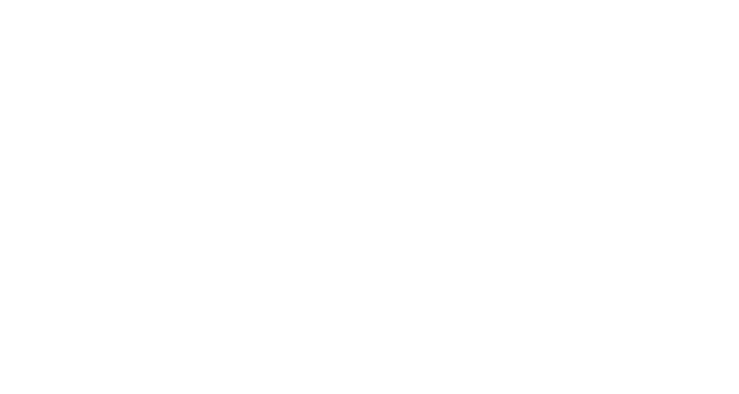

In [38]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

In [39]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 1, 1])

In [40]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.62222222, 0.37777778],
       [0.62222222, 0.37777778],
       [0.89285714, 0.10714286],
       [0.14814815, 0.85185185],
       [0.        , 1.        ]])

In [41]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [42]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[274,  33],
       [ 56, 135]])

In [43]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [47]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

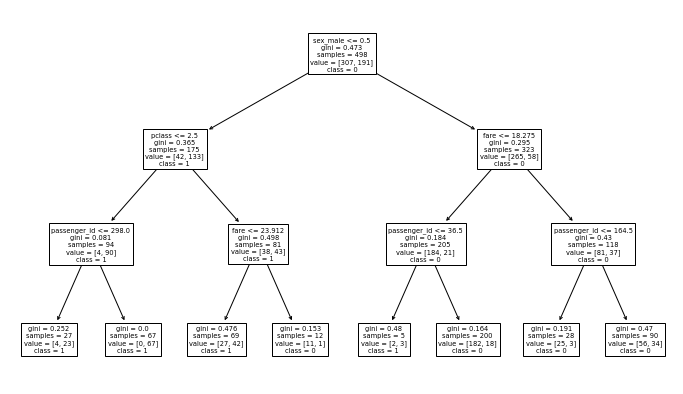

In [48]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [49]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


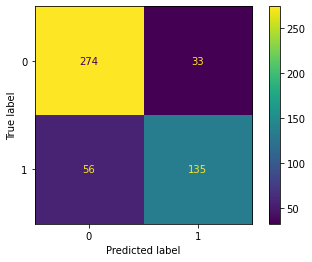

In [52]:
plot_confusion_matrix(tree1, X_train, y_train)

In [53]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       307
           1       0.80      0.71      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



In [54]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.830303,0.803571,0.821285,0.816937,0.820051
recall,0.892508,0.706806,0.821285,0.799657,0.821285
f1-score,0.860283,0.752089,0.821285,0.806186,0.818787
support,307.000000,191.000000,0.821285,498.000000,498.000000


In [55]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

In [56]:
TN, FP, FN, TP

(274, 33, 56, 135)

In [57]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [58]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.821285140562249 

True Positive Rate/Sensitivity/Recall/Power: 0.7068062827225131 

False Positive Rate/False Alarm Ratio/Fall-out: 0.10749185667752444 

True Negative Rate/Specificity/Selectivity: 0.8925081433224755 

False Negative Rate/Miss Rate: 0.2931937172774869 

Precision/PPV: 0.8035714285714286 

F1 Score: 0.7520891364902508 

Support (0): 307 

Support (1): 191


In [60]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()


Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.830303    0.803571  0.821285    0.816937      0.820051
recall       0.892508    0.706806  0.821285    0.799657      0.821285
f1-score     

In [61]:
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.821285,0.775701,0.045584
3,4,0.837349,0.761682,0.075667
4,5,0.849398,0.761682,0.087715
5,6,0.871486,0.738318,0.133168
6,7,0.893574,0.752336,0.141238
7,8,0.913655,0.733645,0.180010
8,9,0.935743,0.724299,0.211444
9,10,0.947791,0.728972,0.218819


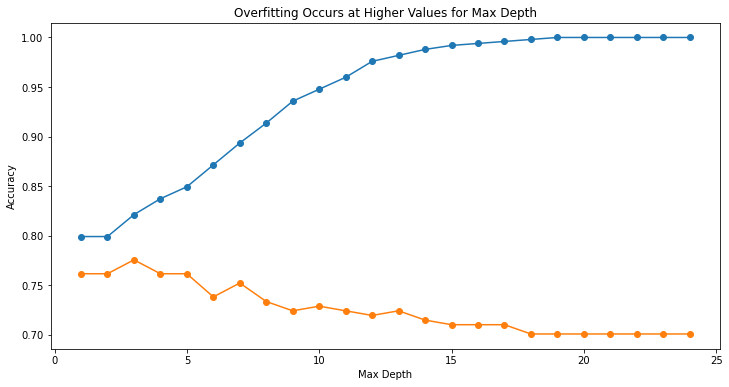

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [63]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.821285,0.775701,0.045584
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
3,4,0.837349,0.761682,0.075667
4,5,0.849398,0.761682,0.087715
